## Домашняя работа #1.

Домашнее задание сдаётся в виде ссылки (с доступом комментатор или редактор) на Colab в опросе:
	https://forms.gle/LJEMdpXAGUvTu8vP8

##Image pre-processing.

В этой домашней работе мы попробуем поприменять самые простые способы обработки изображений.

* Soft deadline: **27.01.2022 03:00:00 +0003 GMT** 
* Hard deadline: **03.02.2022 03:00:00 +0003 GMT**


In [ ]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np
import random as rd
import itertools
import ipywidgets as widgets

##### Задача 1 (3 балла)

Загрузите изображение *lena.png* в переменную **lena**. Отобразите результат на экран. Убедитесь, что `opencv` открывает изображение в формате BGR, переведите его в RGB несколькими способами: 
* c помощью функций split & merge
* с помощью индексации в numpy 
* с помощью cvtColor

In [ ]:
def show_lena(lena, cmp=None): #функция для построения изображения в ячейке
    plt.figure()
    plt.imshow(lena, cmap=cmp)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

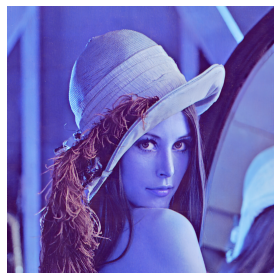

In [ ]:
lena = cv2.imread("/content/lena.png")
show_lena(lena) #Действительно BGR

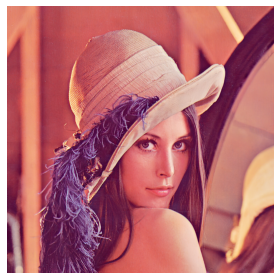

In [ ]:
#1
b,g,r = cv2.split(lena)
rgb_lena = cv2.merge((r, g, b))
show_lena(rgb_lena)

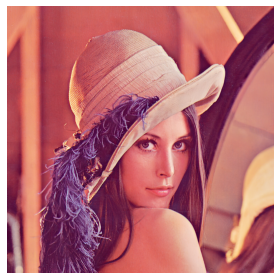

In [ ]:
#2
rgb_lena = lena[:,:,::-1]
show_lena(rgb_lena)

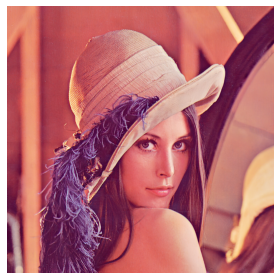

In [ ]:
#3
rgb_lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
show_lena(rgb_lena)

##### Задача 2 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

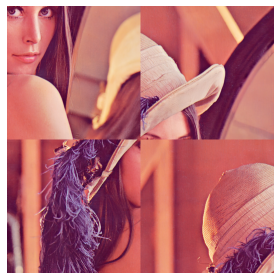

In [ ]:
swapped_lena = rgb_lena.copy()
mid = swapped_lena.shape[0]//2
swapped_lena[:mid, :mid, :] = rgb_lena[mid:, mid:, :].copy()
swapped_lena[mid:, mid:, :] = rgb_lena[:mid, :mid, :].copy()
show_lena(swapped_lena)

##### Задача 3 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**. Переведите исходное цветное изображение lena в изображение в градациях серого с помощью функции cvtColor. (lena_gray_cvt). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране. 

My image:

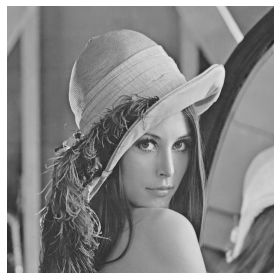

cvtColor image:

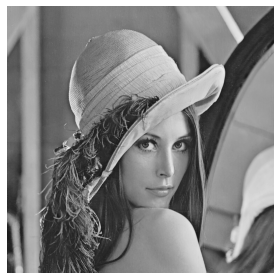

Difference:

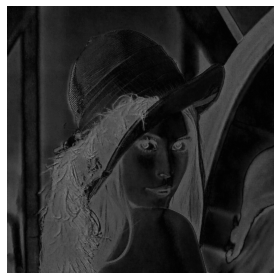

In [ ]:
a = np.mean(lena, axis=2)
lena_gray_my = cv2.merge((a, a, a)).astype("int16")
print("My image:", end='')
show_lena(lena_gray_my)
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY).astype("int16")
print("cvtColor image:", end='')
show_lena(lena_gray_cvt, cmp='gray')
print("Difference:", end='')
show_lena(np.abs(a-lena_gray_cvt), cmp='gray') 
#если я правильно понимаю, что такое модуль разности между изображениями

##### Задача 4 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

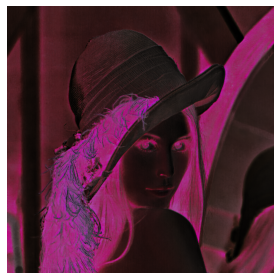

In [ ]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
#print(lena_hsv)
lena_hsv[:, :, 2] = 255 - lena_hsv[:, :, 2] 
#lena_hsv
lena_hsv = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2RGB)
show_lena(lena_hsv)

##### Задача 5 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

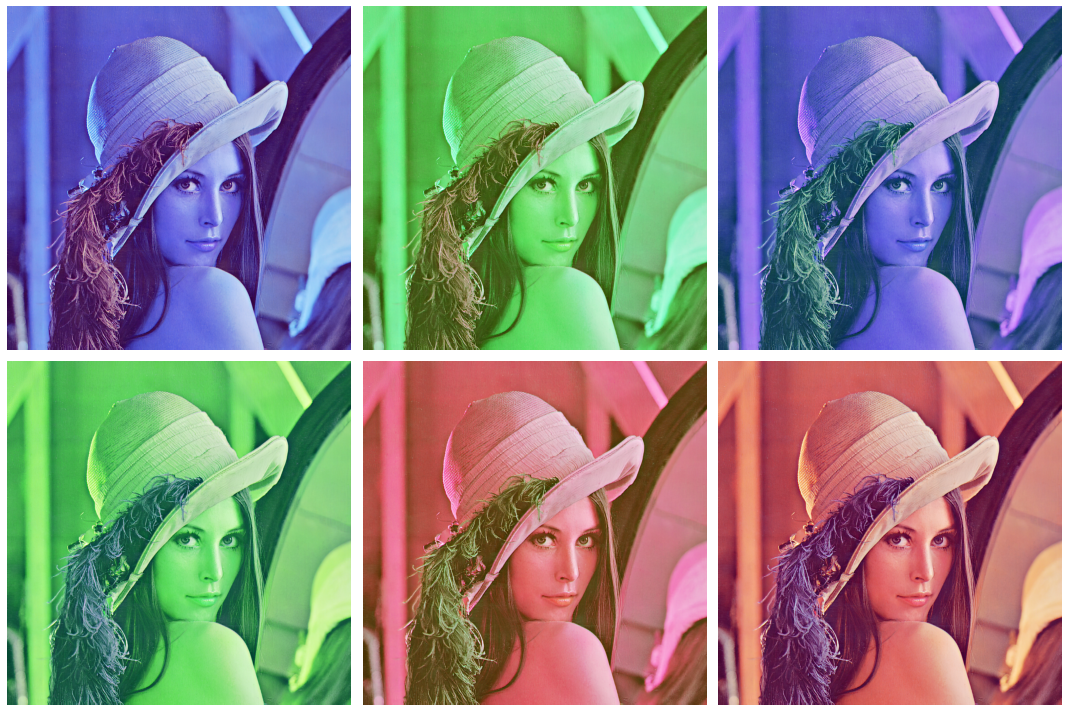

In [ ]:
colors = cv2.split(lena)
p = list(itertools.permutations(colors))
plt.figure(figsize=(15, 10))
for i, channels in enumerate(p):
    new_lena = cv2.merge(channels)
    plt.subplot(2, 3, i+1)
    plt.imshow(new_lena)
    plt.axis('off')
    plt.tight_layout()

### Задача 6 (3 балла)
Переведите изображение **lena** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

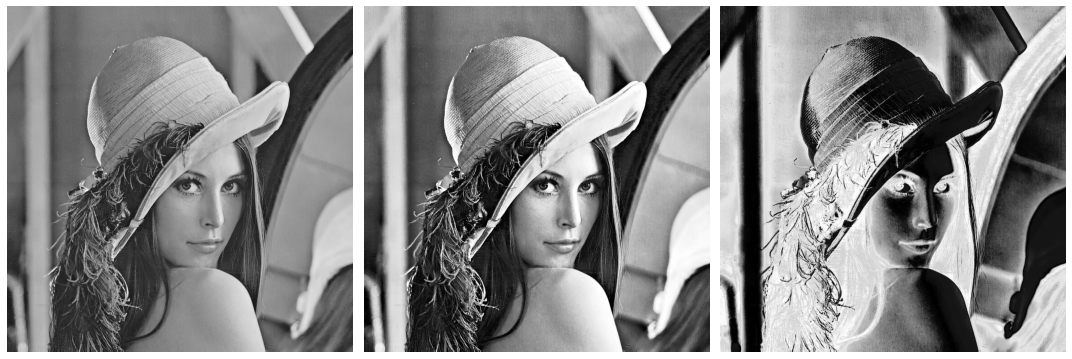

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_norm = cv2.normalize(lena_gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype("int16")
lena_eq = cv2.equalizeHist(lena_gray).astype("int16")
lena_diff = lena_norm - lena_eq

images = [lena_norm, lena_eq, lena_diff]
plt.figure(figsize=(15, 10))
for i, img in enumerate(images):
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.tight_layout()

#### Задача 7 (3 балла)
Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [ ]:
def salt_and_pepper(scr, p=0.05, q =0.05):
    h, w = scr.shape
    out = scr.copy()
    salt_pix = int(p*h*w)
    pepper_pix = int(q*h*w)
    
    salt = [np.random.randint(0, i - 1, salt_pix) for i in scr.shape]
    pepper = [np.random.randint(0, i - 1, pepper_pix) for i in scr.shape]
    
    out[tuple(salt)] = 0
    out[tuple(pepper)] = 255
    return(out)

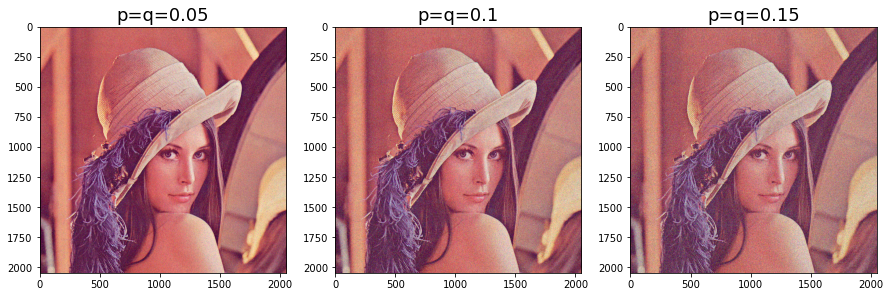

In [ ]:
pq = [0.05, 0.1, 0.15]
plt.figure(figsize=(15, 10))
for i, prob in enumerate(pq):
    r_noise = salt_and_pepper(r, p=prob, q=prob)
    g_noise = salt_and_pepper(g, p=prob, q=prob)
    b_noise = salt_and_pepper(b, p=prob, q=prob)
    plt.subplot(1, 3, i+1)
    plt.title("p=q="+str(prob), fontsize=18)
    plt.imshow(cv2.merge((r_noise, g_noise, b_noise)))
    
    

#### Задча 8 (3 балла)
Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Визуализируйте изображение, представляющее собой разность полученных результатов фильтрации.

In [31]:
def filtr(img, n):
    h, w = img.shape
    filtered = np.zeros((h, w))
    np.pad(filtered, n//2)
    for x in range(n//2, w-n//2+1):
        for y in range(n//2, h-n//2+1):
            tmp = 0
            for i in range(n):
                for j in range(n):
                    tmp += img[x-i, y-j]*1/n**2
            filtered[x-n//2,y-n//2] = tmp
    return filtered

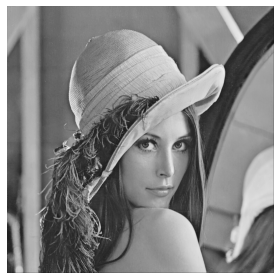

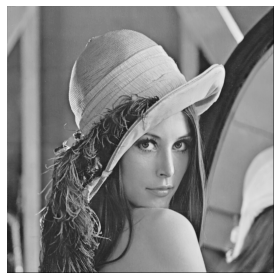

In [32]:
lena_3 = filtr(lena_gray, 3)
lena_5 = filtr(lena_gray, 5)
show_lena(lena_3, cmp='gray')
show_lena(lena_5, cmp='gray')

Difference:


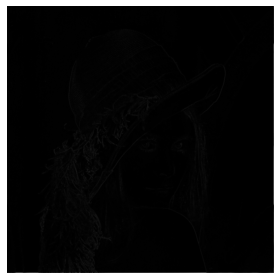

In [ ]:
print("Difference:")
show_lena(np.abs(lena_3-lena_5), cmp="gray")

#### Задача 10 (6 баллов) 
С помощью [виджетов](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции.

In [ ]:
def gammaCorrection(gamma, const):
    deg = 1 / gamma
    prep = [((i) ** deg * const)%256 for i in range(256)]
    table = np.array(prep, np.int16) #здесь исправила uint8 на int16
    #lena
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.LUT(rgb_lena, table))
    plt.axis('off')
    plt.tight_layout()
    #gamma
    x = np.linspace(0, 1, 100)
    y = const*x**deg
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0)
    plt.plot(x, y)

In [ ]:
g = widgets.FloatSlider(
    value=1,
    min=0,
    max=2.5,
    step=0.1,
    description='Gamma:',
    disabled=False,
    continuous_update=False,
    #orientation='vertical',
    readout=True,
    readout_format='.1f',
)
c = widgets.FloatSlider(
    value=1,
    min=0,
    max=2.5,
    step=0.1,
    description='Const:',
    disabled=False,
    continuous_update=False,
    #orientation='vertical',
    readout=True,
    readout_format='.1f',
)
#display(g)
#display(c)
widgets.interact(gammaCorrection, gamma=g, const=c)
None

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Gamma:', max=2.5, readout_f…